# **Goal:**
Our goal is to predict the future trend of a stock, index fund, and a cryptocurrency: Nvidia, S&P 500, and Bitcoin. We will do this by utilizing Long Short Term Memory (LSTM) models that will be trained from historical data and will output the future stock trend. To compare actual values from the predicted values in a visual way, we will present the predicted values overlayed with the actual values. In addition, to determine the accuracy of our LSTM models, we will utilize various performance metrics such as RMSE and MAPE. Also, we'll utilize additional indicators such as simple moving average (SMA), Support/Resistance, and Relative strength index (RSI). From the our initial proposal, our goal is still to determine how the use of LSTM models and various indicators assist in the prediction process for various assets. Below, you can see the finalized product along with us assessing our goal.

In [ ]:

import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt



ticker_symbol = "NVDA"
# Download data from Yahoo Finance for a 4-year period
nvdia = yf.download(ticker_symbol, start="2016-04-08", end="2024-04-08")

crypto_symbol = "BTC-USD"
BTC = yf.download(crypto_symbol, start="2016-04-08", end="2024-04-08")

index_symbol = "SPY"
SPY = yf.download(index_symbol, start="2016-04-08", end="2024-04-08")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Showing first few rows of Bitcoin data
BTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-08,422.907013,425.360992,419.635010,420.348999,420.348999,63454700
2016-04-09,420.811005,420.890991,416.515015,419.411011,419.411011,49792700
2016-04-10,419.592010,422.434998,419.256989,421.563995,421.563995,73478600
2016-04-11,421.872009,422.739014,420.532990,422.483002,422.483002,50747500
2016-04-12,422.842987,427.277008,422.842987,425.190002,425.190002,70728800


In [ ]:
#Showing first few rows of SPY data
SPY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-08,205.339996,205.850006,203.869995,204.500000,177.969406,95040600
2016-04-11,205.250000,206.070007,203.910004,204.020004,177.551666,83757500
2016-04-12,204.220001,206.250000,203.699997,205.919998,179.205109,115350600
2016-04-13,207.000000,208.100006,206.839996,208.000000,181.015305,96336400
2016-04-14,208.070007,208.600006,207.600006,208.009995,181.024094,65212900


In [ ]:
#Showing first few rows of Nvidia data
nvdia.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-08,8.9300,8.9875,8.8275,8.915,8.734539,25593600
2016-04-11,8.9675,9.1175,8.9400,8.970,8.788424,38752400
2016-04-12,9.0000,9.0125,8.7850,8.960,8.778627,29276400
2016-04-13,9.0000,9.1875,9.0000,9.185,8.999071,35071600
2016-04-14,9.1600,9.2500,9.1225,9.210,9.023566,41656400


Data description:

*   Open -> price when the markets open for the day
*   close -> Price when the markets close
*   High -> Highest price of the day
*   Adj Close -> Price Adjusted
*   Volume -> No of shares traded in a day

For the majority of this project we will be focusing on the closing price and redicting the stock price trend.














In [ ]:
import plotly.graph_objects as go

# Creating Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=nvdia.index,
                open=nvdia['Open'],
                high=nvdia['High'],
                low=nvdia['Low'],
                close=nvdia['Close'])])

# Customizing layout
fig.update_layout(
    title='NVIDIA Stock Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()


#Initial data Exploration (Nvidia):

The above chart shows the plotted price for the nvidia stock from the years 2016 - present. The rangeslider makes it easier to view any specific period in the chart history.
The chart consists of candles and their. wicks. The top wicks the high for the day, the bottom wicks the low.
The candle will be green if the open price < close price. The candle will be red if the open price > close price. Over the chart period the price generally has a low variance but in the past couple of months it has a strong uptrend due the rise of AI and the fact that they have cornered 80% of the market for semiconductors that train key AI programs.

In [ ]:
import plotly.graph_objects as go

# Creating Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=BTC.index,
                open=BTC['Open'],
                high=BTC['High'],
                low=BTC['Low'],
                close=BTC['Close'])])

# Customizing layout
fig.update_layout(
    title='BTC Stock Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()


#Initial data Exploration (BTC):

From our initial data exploration of the Bitcoin chart from 2016 until present day, we can see that the stock itself has seen an extremely large uptrend along with high volatility. This tells us that there is much variance throughout the years and that the asset can see significant price swings over relatively short periods of time. Also, there appears to be cyclical behavior, which means that there are periods of rapid growth followed by periods of retracement/consolidation. This may mean that Bitcoins' price movement may be a cause of speculative trading behavior, market sentiment, and economic trends.

In [ ]:
import plotly.graph_objects as go

# Creating Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=SPY.index,
                open=SPY['Open'],
                high=SPY['High'],
                low=SPY['Low'],
                close=SPY['Close'])])

# Customizing layout
fig.update_layout(
    title='S&P Stock Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()


#Initial data Exploration (S&P):

Initial data exploration of the S&P shows a strong uptrend with a couple periods of corrections/consolidations. The S&P can tell us a lot about the economic conditions within the U.S, as it is a mixture of the top 500 companies in the U.S. that influence its stock price. In addition, many other factors such as geopolitical events and investor sentiment all influence the trend/price of the index. The S&P index reflects the inner complexities of market dynamics, which make it a great candidate for further analysis on informed investment strategies.



In [ ]:
# prompt: plot the last 30 day moving average using just the closing price on a new plotly graph hat only contains last years data it still cintains the candle sticks

import plotly.graph_objects as go

# Create a new dataframe with only the last year of data
nvdia_last_year = nvdia.tail(365)

# Calculate the 30-day moving average
nvdia_last_year['30_day_ma'] = nvdia_last_year['Close'].rolling(window=30).mean()

# Create a new plotly figure
fig = go.Figure(data=[go.Candlestick(x=nvdia_last_year.index,
                open=nvdia_last_year['Open'],
                high=nvdia_last_year['High'],
                low=nvdia_last_year['Low'],
                close=nvdia_last_year['Close']),
                go.Scatter(x=nvdia_last_year.index, y=nvdia_last_year['30_day_ma'], name='30-day Moving Average')])

# Customizing layout
fig.update_layout(
    title='NVIDIA Stock Candlestick Chart with 30-day Moving Average',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()


<ipython-input-5-dee5318d2e05>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvdia_last_year['30_day_ma'] = nvdia_last_year['Close'].rolling(window=30).mean()


In [ ]:
# prompt: plot the last 30 day moving average using just the closing price on a new plotly graph hat only contains last years data it still cintains the candle sticks

import plotly.graph_objects as go

# Create a new dataframe with only the last year of data
BTC_last_year = BTC.tail(365)

# Calculate the 30-day moving average
BTC_last_year['30_day_ma'] = BTC_last_year['Close'].rolling(window=30).mean()

# Create a new plotly figure
fig = go.Figure(data=[go.Candlestick(x=BTC_last_year.index,
                open=BTC_last_year['Open'],
                high=BTC_last_year['High'],
                low=BTC_last_year['Low'],
                close=BTC_last_year['Close']),
                go.Scatter(x=BTC_last_year.index, y=BTC_last_year['30_day_ma'], name='30-day Moving Average')])

# Customizing layout
fig.update_layout(
    title='BTC Stock Candlestick Chart with 30-day Moving Average',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()


<ipython-input-7-b40c453e3be6>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Initial data Exploration (BTC):


In [ ]:
# prompt: plot the last 30 day moving average using just the closing price on a new plotly graph hat only contains last years data it still cintains the candle sticks

import plotly.graph_objects as go

# Create a new dataframe with only the last year of data
SPY_last_year = SPY.tail(365)

# Calculate the 30-day moving average
SPY_last_year['30_day_ma'] = SPY_last_year['Close'].rolling(window=30).mean()

# Create a new plotly figure
fig = go.Figure(data=[go.Candlestick(x=SPY_last_year.index,
                open=SPY_last_year['Open'],
                high=SPY_last_year['High'],
                low=SPY_last_year['Low'],
                close=SPY_last_year['Close']),
                go.Scatter(x=SPY_last_year.index, y=SPY_last_year['30_day_ma'], name='30-day Moving Average')])

# Customizing layout
fig.update_layout(
    title='SPY Stock Candlestick Chart with 30-day Moving Average',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()


<ipython-input-8-dc8ac98c1e3c>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Analysis of Moving Average for Nvidia, Bitcoin, and the S&P (Nov 2022-Mar 2024)

 The moving average represents the average price of an asset over a set period of time (in this case, we have a 15 month MA). Since MA is a smoothed trendline, the short-term fluctuations are cut out and the longer-term price movements are shown. By analyzing the price at a specified time vs. the MA, valuable insights can be gained, specifically insights when it comes to stock prediction.

 In the case of Nvidia, it can be seen that the stock traded above the MA for the majority of the time throughout the 15 months. This suggests that the company itself has had extremely strong financial performance, and as a result of this, the company has been in an extremely bullish uptrend in these 15 months. This suggests that Nvidia is a strong company and the stock itself seemingly is a great investment at this moment in time.

Since November 2022, Bitcoin has also traded above the MA for a majority of the time. From the chart, we can see certain periods of time where the sentiment surrounding Bitcoin was slightly bearish, and other times where the sentiment is majority bullish. As of right now in April 2024, Bitcoin is trading at just about the MA after trading much higher than it. This is a good sign as it showns consolidation at the current prices while not dropping too low.

The S&P provides great insights into current sentiment surrounding economic conditions within the U.S, and the MA highlights certain periods where encomic conditions have not been great since November 2022. As of right now in April 2024, the S&P has been trading above the MA since November of 2023. This shows that the economy has been through significant economic growth and that economic-wise, the U.S is doing well. Based off MA and past historical data, the S&P is a good investment.

The MA has provided us very positive insight into Nvidia, Bitcoin and the S&P, but, we need additional indicators to make an informed decision. Because of this, we will be exploring into the Relative Strength Index (RSI) and Support/Resistance in these next sections.

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def calculate_rsi(df, period=14):
    """ Calculate the RSI from a DataFrame with 'Close' prices. """
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [ ]:

# Download data from Yahoo Finance for a 4-year period
ticker_symbol = "NVDA"
nvidia = yf.download(ticker_symbol, start="2016-04-08", end="2024-04-08")

# Calculate RSI
nvidia['RSI'] = calculate_rsi(nvidia)

# Create subplots: one for candlestick, one for RSI
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03, subplot_titles=('NVIDIA Stock Candlestick', 'RSI'),
                    row_heights=[0.7, 0.3])

# Add the candlestick chart
fig.add_trace(
    go.Candlestick(x=nvidia.index,
                   open=nvidia['Open'], high=nvidia['High'],
                   low=nvidia['Low'], close=nvidia['Close'],
                   name="Candlestick"),
    row=1, col=1
)

# Add RSI trace
fig.add_trace(
    go.Scatter(x=nvidia.index, y=nvidia['RSI'], mode='lines', name='RSI'),
    row=2, col=1
)

# Update RSI plot to add upper and lower bounds
fig.update_yaxes(range=[0, 100], row=2, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=2, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=2, col=1)

# Customizing layout
fig.update_layout(
    title='NVIDIA Stock Data Analysis',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False  # disable range slider to synchronize x-axis zoom
)

# Show the plot
fig.show()


[*********************100%%**********************]  1 of 1 completed


In [ ]:

# Download data from Yahoo Finance for a 4-year period
ticker_symbol = "BTC-USD"
BTC = yf.download(ticker_symbol, start="2016-04-08", end="2024-04-08")

# Calculate RSI
BTC['RSI'] = calculate_rsi(BTC)

# Create subplots: one for candlestick, one for RSI
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03, subplot_titles=('BTC Stock Candlestick', 'RSI'),
                    row_heights=[0.7, 0.3])

# Add the candlestick chart
fig.add_trace(
    go.Candlestick(x=BTC.index,
                   open=BTC['Open'], high=BTC['High'],
                   low=BTC['Low'], close=BTC['Close'],
                   name="Candlestick"),
    row=1, col=1
)

# Add RSI trace
fig.add_trace(
    go.Scatter(x=BTC.index, y=BTC['RSI'], mode='lines', name='RSI'),
    row=2, col=1
)

# Update RSI plot to add upper and lower bounds
fig.update_yaxes(range=[0, 100], row=2, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=2, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=2, col=1)

# Customizing layout
fig.update_layout(
    title=' BTC Stock Data Analysis',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False  # disable range slider to synchronize x-axis zoom
)

# Show the plot
fig.show()


[*********************100%%**********************]  1 of 1 completed


In [ ]:

# Download data from Yahoo Finance for a 4-year period
ticker_symbol = "SPY"
SPY = yf.download(ticker_symbol, start="2016-04-08", end="2024-04-08")

# Calculate RSI
SPY['RSI'] = calculate_rsi(SPY)

# Create subplots: one for candlestick, one for RSI
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03, subplot_titles=('SPY Stock Candlestick', 'RSI'),
                    row_heights=[0.7, 0.3])

# Add the candlestick chart
fig.add_trace(
    go.Candlestick(x=SPY.index,
                   open=SPY['Open'], high=SPY['High'],
                   low=SPY['Low'], close=SPY['Close'],
                   name="Candlestick"),
    row=1, col=1
)

# Add RSI trace
fig.add_trace(
    go.Scatter(x=SPY.index, y=SPY['RSI'], mode='lines', name='RSI'),
    row=2, col=1
)

# Update RSI plot to add upper and lower bounds
fig.update_yaxes(range=[0, 100], row=2, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=2, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=2, col=1)

# Customizing layout
fig.update_layout(
    title='SPY Stock Data Analysis',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False  # disable range slider to synchronize x-axis zoom
)

# Show the plot
fig.show()


[*********************100%%**********************]  1 of 1 completed


# Analysis of RSI for Nvidia, Bitcoin, and the S&P (2016-2024)

The Relative Strength Index (RSI) is a momentum oscillator that displays the speed and change of price movements, indicating whether an asset is to be considered overbought or oversold at that point in time. By using this on Nvidia, Bitcoin, and the S&P through 2016 until present day, we can detect potential reversal points.

Based off RSI, Nvidia is considered to be fairly priced, as RSI sits at about the ~50 mark (an RSI 70>= is considered to be overbought, while an RSI of <=30 is considered to be oversold.) As RSI considered it to be fairly priced, the price of Nvidia can go in either direction based off of RSI alone, so because of this, we need to look at the support and resistance at these levels to determine the future trend of the stock.

Bitcoin is in a similar predicament, as it is hard to determine the future trend of the stock based off RSI as it is considered to be fairly valued, sitting at about ~60 RSI. It is leaning more toward the 'overbought' region, though, so this shows a lot of buying pressure on Bitcin which may indicate positive sentiment in the cryptocurrency.

The last RSI we will be analyzing is the S&P RSI, which is sitting at about ~65 RSI. The RSI considers the stock to be fairly valued while still not crossing the overbought level, which tells us that there is buying pressure while maintaining consolidation. This is bullish for the index fund and tells us that there is bullish sentiment here for the stock.

We have now analyzed two indicators : Moving Average and RSI, but we still need to look at support and resistance to make the best informed decision we can. In this next section, we will dive into reading support and resistance for these assets.



In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go

# Download NVIDIA stock data for the last 3 months
ticker_symbol = "NVDA"
end_date = "2024-04-08"  # Current date for reference
start_date = pd.to_datetime(end_date) - pd.DateOffset(months=3)
nvidia = yf.download(ticker_symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date)

# Define support and resistance detection functions
def isSupport(df, i):
    return df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] \
           and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

def isResistance(df, i):
    return df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] \
           and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]

# Detect key levels
levels = []
s = np.mean(nvidia['High'] - nvidia['Low'])  # Average candle size for distance check

def isFarFromLevel(l, levels, s):
    return np.all([abs(l-x) > s for _, x in levels])

for i in range(2, nvidia.shape[0] - 2):
    if isSupport(nvidia, i):
        l = nvidia['Low'][i]
        if isFarFromLevel(l, levels, s):
            levels.append((nvidia.index[i], l))
    elif isResistance(nvidia, i):
        l = nvidia['High'][i]
        if isFarFromLevel(l, levels, s):
            levels.append((nvidia.index[i], l))

# Creating Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=nvidia.index,
                                     open=nvidia['Open'],
                                     high=nvidia['High'],
                                     low=nvidia['Low'],
                                     close=nvidia['Close'])])

# Add horizontal lines for levels
for date, level in levels:
    fig.add_shape(type="line",
                  x0=nvidia.index[0], y0=level, x1=nvidia.index[-1], y1=level,
                  line=dict(color="blue", width=1.5, dash="dot"),
                  xref='x', yref='y')

# Customizing layout
fig.update_layout(
    title='NVIDIA Stock Candlestick Chart with Support and Resistance Levels (Last 3 Months)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go

# Download Bitcoin (BTC-USD) data for the last 3 months
ticker_symbol = "BTC-USD"
end_date = "2024-04-08"  # Current date for reference
start_date = pd.to_datetime(end_date) - pd.DateOffset(months=3)
bitcoin = yf.download(ticker_symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date)

# Define support and resistance detection functions
def isSupport(df, i):
    return df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] \
           and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

def isResistance(df, i):
    return df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] \
           and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]

# Detect key levels
levels = []
s = np.mean(bitcoin['High'] - bitcoin['Low'])  # Average candle size for distance check

def isFarFromLevel(l, levels, s):
    return np.all([abs(l-x) > s for _, x in levels])

for i in range(2, bitcoin.shape[0] - 2):
    if isSupport(bitcoin, i):
        l = bitcoin['Low'][i]
        if isFarFromLevel(l, levels, s):
            levels.append((bitcoin.index[i], l))
    elif isResistance(bitcoin, i):
        l = bitcoin['High'][i]
        if isFarFromLevel(l, levels, s):
            levels.append((bitcoin.index[i], l))

# Creating Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=bitcoin.index,
                                     open=bitcoin['Open'],
                                     high=bitcoin['High'],
                                     low=bitcoin['Low'],
                                     close=bitcoin['Close'])])

# Add horizontal lines for levels
for date, level in levels:
    fig.add_shape(type="line",
                  x0=bitcoin.index[0], y0=level, x1=bitcoin.index[-1], y1=level,
                  line=dict(color="blue", width=1.5, dash="dot"),
                  xref='x', yref='y')

# Customizing layout
fig.update_layout(
    title='Bitcoin (BTC-USD) Candlestick Chart with Support and Resistance Levels (Last 3 Months)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go

# Download SPDR S&P 500 ETF (SPY) data for the last 3 months
ticker_symbol = "SPY"
end_date = "2024-04-08"  # Current date for reference
start_date = pd.to_datetime(end_date) - pd.DateOffset(months=3)
spy = yf.download(ticker_symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date)

# Define support and resistance detection functions
def isSupport(df, i):
    return df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] \
           and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

def isResistance(df, i):
    return df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] \
           and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]

# Detect key levels
levels = []
s = np.mean(spy['High'] - spy['Low'])  # Average candle size for distance check

def isFarFromLevel(l, levels, s):
    return np.all([abs(l-x) > s for _, x in levels])

for i in range(2, spy.shape[0] - 2):
    if isSupport(spy, i):
        l = spy['Low'][i]
        if isFarFromLevel(l, levels, s):
            levels.append((spy.index[i], l))
    elif isResistance(spy, i):
        l = spy['High'][i]
        if isFarFromLevel(l, levels, s):
            levels.append((spy.index[i], l))

# Creating Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=spy.index,
                                     open=spy['Open'],
                                     high=spy['High'],
                                     low=spy['Low'],
                                     close=spy['Close'])])

# Add horizontal lines for levels
for date, level in levels:
    fig.add_shape(type="line",
                  x0=spy.index[0], y0=level, x1=spy.index[-1], y1=level,
                  line=dict(color="blue", width=1.5, dash="dot"),
                  xref='x', yref='y')

# Customizing layout
fig.update_layout(
    title='SPDR S&P 500 ETF (SPY) Candlestick Chart with Support and Resistance Levels (Last 3 Months)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()


[*********************100%%**********************]  1 of 1 completed


# Analysis of Support/Resistance for Nvidia, Bitcoin, and the S&P (Last 3 months)
Support and resistance are crucial indicators used to identify price barriers and turning points for the market. In our scenario, we will be identifying these barriers for the last three months.

Looking at Nvidia's support and resistance levels for April of 2024, we can see that Nvidia has recently fallen through support, which indicates that Nvidia may fall in the short term  if it does not retrace up past the resistance again. Looking at Bitcoins' support and resistance level chart, we can see that Bitcoin has broken through its resistance level of about 65,000. This means that there is a lot of buying pressure for Bitcoin and there is likely to be a  uptrend until the next resistance level of about 70,000. For the S&P, it is noticeable that there was strong resistance at the 520 level, which it had tested and then dropped back to about $510. From there, the S&P rose back past 515 which indicates strong support at these levels. This tells us there is a lot of buying pressure at these levels for the S&P and that the stock is bullish enough to continue an uptrend.





#Evaluation

Based on our technical analysis, Nvidia is anticipated to undergo a short-term retracement from these current levels due to RSI and resistance signals, while the bullish moving average suggests that the stock is likely to continue its long-term uptrend. For Nvidia, it may be wise to short the stock short-term if looking for a quick play, but Nvidia is all around a good hold and is likely to keep going up in the future long-term. Bitcoin also shows a bullish moving average, as well as showing strong support at these levels and a fair-valued RSI. This tells us that BTC is very likely to continue its upward movement into the future both short-term and long-term. Similar to Bitcoin and Nvidia, the S&P has consistently traded above the MA for months, which tells us there is a lot of bullish sentiment around the stock. With MA coupled with a fair-valued RSI and strong support levels, the S&P is likely to keep rising both short-term and long-term.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [ ]:
train_data = nvdia.loc['2018-04-08':'2023-04-08']
test_data = nvdia.loc['2023-04-09':'2024-04-08']

#BTC Train/Test split
train_data2 = BTC.loc['2018-04-08':'2023-04-08']
test_data2 = BTC.loc['2023-04-09':'2024-04-08']

#S&P Train/Test
train_data3 = SPY.loc['2018-04-08':'2023-04-08']
test_data3 = SPY.loc['2023-04-09':'2024-04-08']

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data['Close'].values.reshape(-1, 1))

#BTC Data Normalization
scaled_train_data2 = scaler.fit_transform(train_data2['Close'].values.reshape(-1, 1))

#S&P Data Normalization
scaled_train_data3 = scaler.fit_transform(train_data3['Close'].values.reshape(-1, 1))


In [ ]:
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)
n_steps = 60

In [ ]:
def lstm_split(data, n_steps):
  X, y = [], []
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i + n_steps, :-1])
    y.append(data[i + n_steps-1, -1])

  return np.array (X), np.array (y)

In [ ]:
#Prepare the NVDA dataset for prediction
X_train, y_train = prepare_data(scaled_train_data, n_steps)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_train2, y_train2 = prepare_data(scaled_train_data2, n_steps)
X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)

#Prepare the S&P dataset for prediction
X_train3, y_train3 = prepare_data(scaled_train_data3, n_steps)
X_train3 = X_train3.reshape(X_train3.shape[0], X_train3.shape[1], 1)


In [ ]:
#Define the LSTM model
model = Sequential()
model.add(LSTM(80, return_sequences=True,input_shape=(n_steps, 1)))
model.add(LSTM(80))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

BTCmodel = Sequential()
BTCmodel.add(LSTM(80, return_sequences=True,input_shape=(n_steps, 1)))
BTCmodel.add(LSTM(80))
BTCmodel.add(Dense(1))
BTCmodel.compile(optimizer='adam', loss='mean_squared_error')

SPYmodel = Sequential()
SPYmodel.add(LSTM(80, return_sequences=True,input_shape=(n_steps, 1)))
SPYmodel.add(LSTM(80))
SPYmodel.add(Dense(1))
SPYmodel.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#Train the LSTM model
model.fit(X_train, y_train, epochs=5, batch_size=4, verbose=1)

#Make predictions for the entire dataset
scaled_test_data = scaler.transform(test_data['Close'].values.reshape(-1, 1))
X_test, y_test = prepare_data(scaled_test_data, n_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

Epoch 1/5
300/300 [==============================] - 17s 43ms/step - loss: 0.0031
Epoch 2/5
300/300 [==============================] - 17s 57ms/step - loss: 0.0012
Epoch 3/5
300/300 [==============================] - 13s 43ms/step - loss: 9.0835e-04
Epoch 4/5
300/300 [==============================] - 13s 43ms/step - loss: 7.9296e-04
Epoch 5/5
6/6 [==============================] - 1s 21ms/step


In [ ]:
#Train BTC LSTM model
BTCmodel.fit(X_train2, y_train2, epochs=10, batch_size=4, verbose=1)

#Make predictions for the entire dataset
scaled_test_data2 = scaler.transform(test_data2['Close'].values.reshape(-1, 1))
X_test2, y_test2 = prepare_data(scaled_test_data2, n_steps)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)
BTCpredicted_prices = BTCmodel.predict(X_test2)
BTCpredicted_prices = scaler.inverse_transform(BTCpredicted_prices)


Epoch 1/10
442/442 [==============================] - 28s 49ms/step - loss: 0.0030
Epoch 2/10
442/442 [==============================] - 23s 53ms/step - loss: 9.6967e-04
Epoch 3/10
442/442 [==============================] - 25s 57ms/step - loss: 8.3385e-04
Epoch 4/10
442/442 [==============================] - 24s 53ms/step - loss: 5.5797e-04
Epoch 5/10
442/442 [==============================] - 23s 52ms/step - loss: 4.5360e-04
Epoch 6/10
442/442 [==============================] - 23s 51ms/step - loss: 4.5984e-04
Epoch 7/10
442/442 [==============================] - 24s 54ms/step - loss: 4.3902e-04
Epoch 8/10
442/442 [==============================] - 24s 53ms/step - loss: 4.8088e-04
Epoch 9/10
442/442 [==============================] - 23s 53ms/step - loss: 4.3773e-04
Epoch 10/10
10/10 [==============================] - 1s 35ms/step


In [ ]:
#Train SPY LSTM model
SPYmodel.fit(X_train3, y_train3, epochs=5, batch_size=4, verbose=1)

#Make predictions for the entire dataset
scaled_test_data3 = scaler.transform(test_data3['Close'].values.reshape(-1, 1))
X_test3, y_test3 = prepare_data(scaled_test_data3, n_steps)
X_test3 = X_test3.reshape(X_test3.shape[0], X_test3.shape[1], 1)
SPYpredicted_prices = SPYmodel.predict(X_test3)
SPYpredicted_prices = scaler.inverse_transform(SPYpredicted_prices)

Epoch 1/5
300/300 [==============================] - 19s 43ms/step - loss: 0.0070
Epoch 2/5
300/300 [==============================] - 13s 43ms/step - loss: 0.0015
Epoch 3/5
300/300 [==============================] - 14s 48ms/step - loss: 0.0015
Epoch 4/5
300/300 [==============================] - 14s 46ms/step - loss: 0.0010
Epoch 5/5
6/6 [==============================] - 1s 22ms/step


In [ ]:
predicted_prices = scaler.inverse_transform(predicted_prices)
BTCpredicted_prices = scaler.inverse_transform(BTCpredicted_prices)
SPYpredicted_prices = scaler.inverse_transform(SPYpredicted_prices)

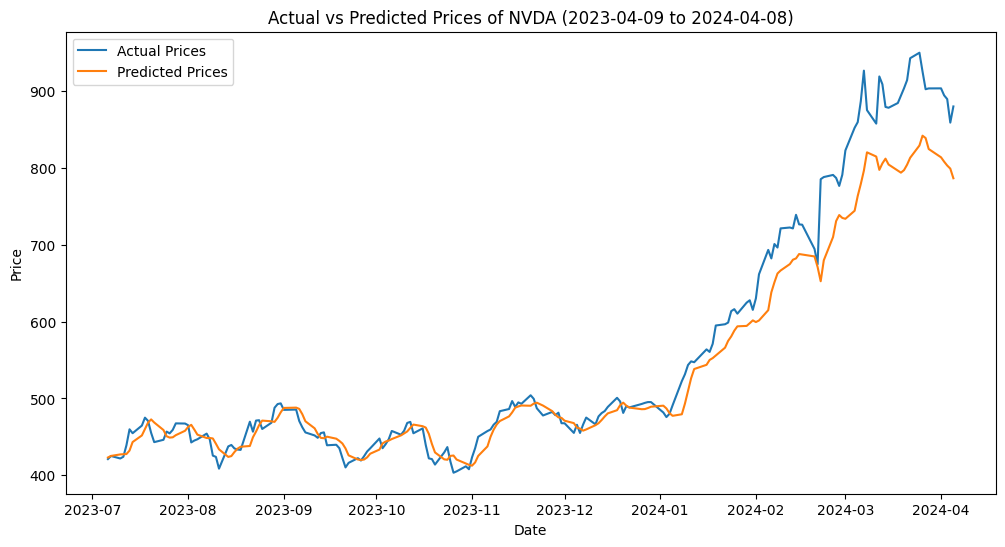

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data.index[n_steps:], test_data['Close'].values[n_steps:], label='Actual Prices')
plt.plot(test_data.index[n_steps:], predicted_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Prices of NVDA (2023-04-09 to 2024-04-08)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

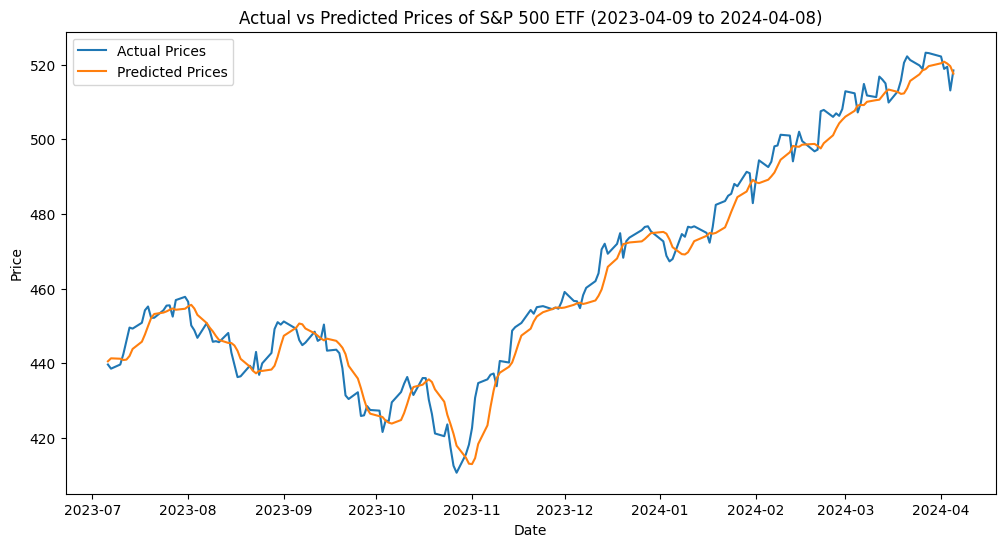

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data3.index[n_steps:], test_data3['Close'].values[n_steps:], label='Actual Prices')
plt.plot(test_data3.index[n_steps:], SPYpredicted_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Prices of S&P 500 ETF (2023-04-09 to 2024-04-08)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# BTC Train/Test split
train_data2 = BTC.loc['2018-04-08':'2023-04-08']
test_data2 = BTC.loc['2023-04-09':'2024-04-08']

# BTC Data Normalization
scaled_train_data2 = scaler.fit_transform(train_data2['Close'].values.reshape(-1, 1))
scaled_test_data2 = scaler.transform(test_data2['Close'].values.reshape(-1, 1))

def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 60

X_train2, y_train2 = prepare_data(scaled_train_data2, n_steps)
X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)

X_test2, y_test2 = prepare_data(scaled_test_data2, n_steps)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)

BTCmodel = Sequential()
BTCmodel.add(LSTM(80, return_sequences=True, input_shape=(n_steps, 1)))
BTCmodel.add(LSTM(80))
BTCmodel.add(Dense(1))
BTCmodel.compile(optimizer='adam', loss='mean_squared_error')

# Train BTC LSTM model
BTCmodel.fit(X_train2, y_train2, epochs=10, batch_size=4, verbose=1)

# Make predictions for the entire dataset
BTCpredicted_prices = BTCmodel.predict(X_test2)
BTCpredicted_prices = scaler.inverse_transform(BTCpredicted_prices)



Epoch 1/10
442/442 [==============================] - 29s 51ms/step - loss: 0.0026
Epoch 2/10
442/442 [==============================] - 23s 52ms/step - loss: 0.0011
Epoch 3/10
442/442 [==============================] - 23s 52ms/step - loss: 7.5145e-04
Epoch 4/10
442/442 [==============================] - 22s 51ms/step - loss: 6.0556e-04
Epoch 5/10
442/442 [==============================] - 23s 52ms/step - loss: 5.2371e-04
Epoch 6/10
442/442 [==============================] - 23s 52ms/step - loss: 4.5893e-04
Epoch 7/10
442/442 [==============================] - 23s 53ms/step - loss: 4.6193e-04
Epoch 8/10
442/442 [==============================] - 23s 52ms/step - loss: 3.8080e-04
Epoch 9/10
442/442 [==============================] - 23s 52ms/step - loss: 4.4667e-04
Epoch 10/10
10/10 [==============================] - 1s 25ms/step


NameError: name 'plt' is not defined

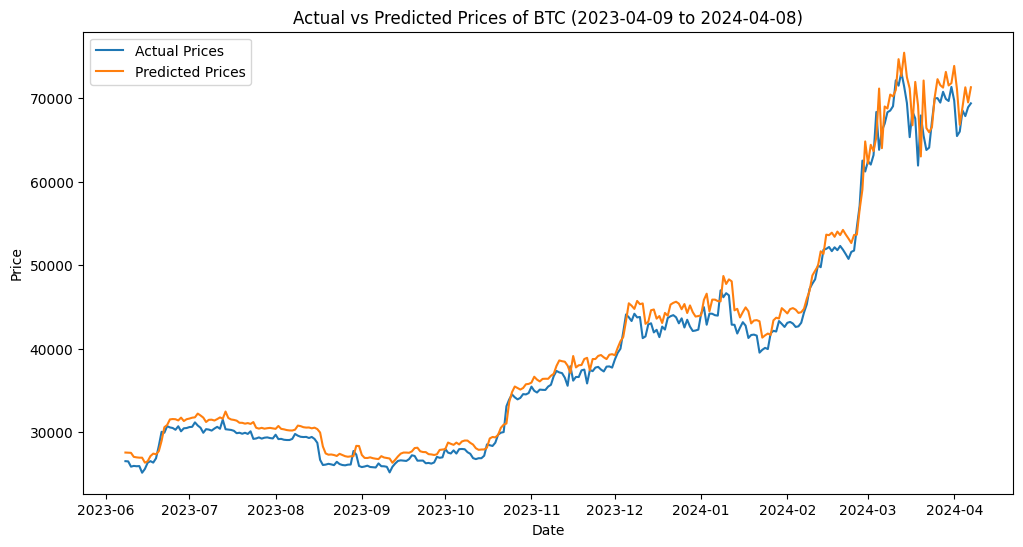

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data2.index[n_steps:], test_data2['Close'].values[n_steps:], label='Actual Prices')
plt.plot(test_data2.index[n_steps:], BTCpredicted_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Prices of BTC (2023-04-09 to 2024-04-08)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Calculate RMSE
#rmse = np.sqrt(mean_squared_error(test_data['Close'].values[n_steps:], predicted_prices))
BTCrmse = np.sqrt(mean_squared_error(test_data2['Close'].values[n_steps:], BTCpredicted_prices))
#SPYrmse = np.sqrt(mean_squared_error(test_data3['Close'].values[n_steps:], SPYpredicted_prices))

#Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#mape = mean_absolute_percentage_error(test_data['Close'].values[n_steps:], predicted_prices)
BTCmape = mean_absolute_percentage_error(test_data2['Close'].values[n_steps:], BTCpredicted_prices)
#SPYmape = mean_absolute_percentage_error(test_data3['Close'].values[n_steps:], SPYpredicted_prices)

#Print RMSE and MAPE
#print("NVDA Metrics:")
#print(f"RMSE: {rmse}")
#print(f"MAPE: {mape}")

#Print RMSE and MAPE for BTC LSTM
print("BTC Metrics:")
print(f"RMSE: {BTCrmse}")
print(f"MAPE: {BTCmape}")

#Print RMSE and MAPE for SPY LSTM
#print("SPY Metrics:")
#print(f"RMSE: {SPYrmse}")
#print(f"MAPE: {SPYmape}")


BTC Metrics:
RMSE: 1792.0623737033447
MAPE: 37.98638737215828


#LSTM Prediction Results and Performance Metrics

We used a LSTM (Long Short-Term Memory) model, a type of neural network model, for predicting the future stock values due to its ability to learn long-term dependencies based on sequential data. We trained our neural network model with five epochs, which gave the model enough time to accurately predict the *trend* of our stock. In addition, we utilized performance metrics such as RMSE and MAPE to determine the performance of our model.

Our LSTM model for Nvidia yielded us an RMSE of 41.6, which means that the model, on average, was 41.6 values points off the actual value of the data. Our MAPE was 21.5%, which told us that the model's predictions, on average, deviated from the true value by 21.5%. Bitcoin was our worst performing model due to its high volatility, and our RMSE ended up being 1792, which told us that the predicted values deviated from the actual value by 1792. Our MAPE was 37.98%, which is not an amazing MAPE if you're trying to predict exact prices, but we are only predicting trends, so our model did that very well. The S&P was our best performing model as it had the best pattern distribution in terms of historical data. The S&P model yielded an RMSE of 5.1 and a MAPE of 7.1%, which is a high performing model.

Alone by itself, LSTM models are already a strong tool - but when combined with the indicators we had used (MA, RSI, Support/Resistance), we can make informed decisions that can ultimately yield us a positive outcome.




#Conclusion


In our analysis of support and resistance levels for Nvidia, Bitcoin, and the S&P over the last three months, we've identified key trends and turning points using technical indicators like moving averages (MA), Relative Strength Index (RSI), and support/resistance levels. Nvidia may see a short-term retracement, but its bullish moving average suggests a positive long-term outlook. Bitcoin's breach of resistance signals strong buying pressure and an uptrend, while the S&P's consistent trading above moving averages and strong support levels indicate continued bullish sentiment. Our LSTM models for stock value prediction, despite challenges with Bitcoin's volatility, provided valuable insights, particularly for Nvidia and the S&P. By combining LSTM models with technical indicators, we've enhanced our ability to make informed trading decisions, highlighting the synergy between advanced predictive modeling and traditional technical analysis in navigating financial markets.

#Discussion

While LSTM models performed well and forecasted the overall trend of the stock their values for the MAPE and RMSE were relatively high. Fine-tuning their architecture and hyperparameters could enable us to predict their exact values instead of forecasting the overall trend. Research and experiments with different network architectures, adjusting the number of layers, neurons, and optimizing the learning rate and batch size could significantly enhance the model's performance.
The technical indicators enabled highly acurate forecasts of the future performance in both the short and long term. Testing and incorporating additional technical indicators beyond the moving average, support and resistance levels and the RSI could provide a more comprehensive view of market trends and potential price movements. Implementing a correlation matrix using a heatmap could be a helpful tool to depict their mutual relationship and performance impacts.
An interesting incorporation would be sentiment analysis. By leveraging sentiment data from platforms like Twitter, we can capture market sentiment in real time, providing a valuable additional dimension to our analysis. Analyzing the correlation between social media sentiment and stock price movements can offer unique insights into investor sentiment and market dynamics.
In conclusion, by implementing these suggestions and leveraging insights gained from this discussion, this project could offer valuable contributions to the field of financial forecasting and predictive analytics.

#Related Work



"Stock price prediction using LSTM, RNN and CNN-sliding window model" by Chunfeng Wu, Haifeng Li, and Xiaojie Yang (2019): This paper compares the performance of LSTM, RNN, and CNN models for stock price prediction using a sliding window approach, highlighting the effectiveness of deep learning techniques in financial forecasting.

"Predicting stock prices using sentiment analysis of Twitter data" by Yudong Zhang and P. Raghavendra Rau (2018): This paper investigates the use of sentiment analysis of Twitter data to predict stock prices, demonstrating the potential of social media data in forecasting financial markets.

"A comparative study of LSTM, ARIMA, and hybrid models for time series forecasting" by Rahul Gupta, Abhay Kumar, and Pankaj Kumar (2020): This study compares the performance of LSTM, ARIMA, and hybrid models for time series forecasting tasks, including stock price prediction, providing insights into the strengths and weaknesses of each approach.